In [1]:
%matplotlib inline
import pykat
import pykat.optics.ABCD as abcd
import pylab as pl
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

### My functions
from kat_commands import *
from MMT import *
from cav_commands import *
from load_kat_data import *
import get_WS
import trace_mode

                                              ..-
    PyKat 1.0.19          _                  '(
                          \`.|\.__...-""""-_." )
       ..+-----.._        /  ' `            .-'
   . '            `:      7/* _/._\    \   (
  (        '::;;+;;:      `-"' =" /,`"" `) /
  L.        \`:::a:f            c_/     n_'
  ..`--...___`.  .    ,  
   `^-....____:   +.      www.gwoptics.org/pykat



C:\Users\tvo88\Anaconda3\lib\site-packages\pykat\finesse.py:1651: UserWarning: 'KatRun2D' does not have attribute called 'yaxis'
  r.yaxis = self.yaxis


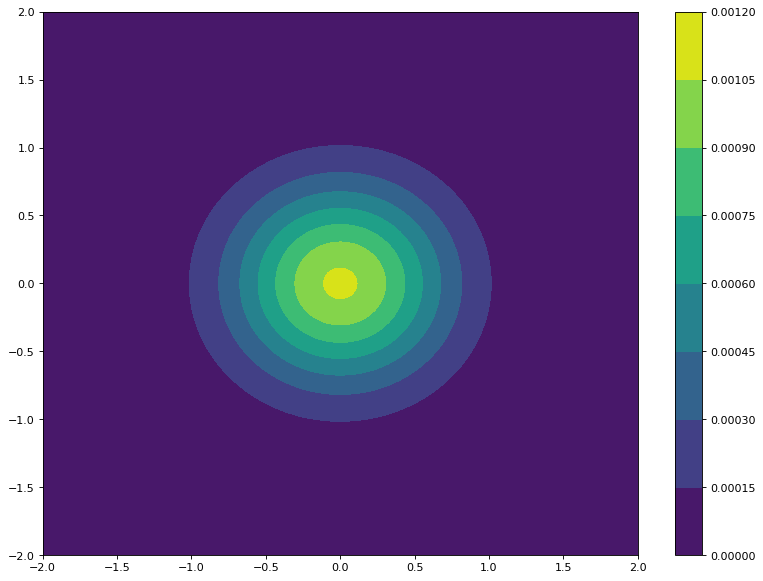

In [86]:
kat_code = """
# Laser input
l l1 $Pin 0 nin
s s1 0 nin nprc1

# Power recycling mirror
m1 prm $prmT 0 90 nprc1 nprc2
s prc $lprc nprc2 nbsin

# Central beamsplitter
bs bs1 .5 .5 0 45 nbsin n0y n0x nbsout

# X-arm
s ichx $lmichx n0x n1x
m1 itmx $itmT 0 90 n1x n2x
s armx $Larm n2x n3x
m1 etmx 5u 0 89.999875 n3x n4x
attr itmx mass $Mtm zmech sus1
attr etmx mass $Mtm zmech sus1

# Y-arm
s ichy $lmichy n0y n1y
m1 itmy $itmT 0 0.000125  n1y n2y
s army $Larm n2y n3y
m1 etmy 5u 0 0.0035 n3y n4y
attr itmy mass $Mtm zmech sus1
attr etmy mass $Mtm zmech sus1

# Signal recycling mirror
s src $lsrc nbsout nsrc1
m1 srm $srmT 0 $srm_phi nsrc1 nsrc2

pd1 asport $fs nsrc2 % photo detector in South port
beam b1 nsrc2
xaxis b1 x lin -2 2 100
x2axis b1 y lin -2 2 100


# Force-to-position transfer function for longitudinal
# motions of test masses
tf sus1 1 0 p $mech_fres $mech_Q
const mech_fres 1 # 9 sus-thermal spike
const mech_Q 1M # Guess for suspension Q factor

# DC readout: 100mW = michy_phi 0.07 _or_ darm_phi .00025

const Larm 3994.5
const itmT 0
const srmT 1
const prmT 1
const Pin 1
const Mtm 40
const srm_phi 0
const lmichx 4.5
const lmichy 4.45
const lprc 53
const lsrc 50.525

attr itmy Rc -1934
attr etmy Rc 2245

attr itmx Rc -1934
attr etmx Rc 2245
"""

pd_output = """
xaxis etmy phi lin 0 360 100 % changing the microscopic position of mN
"""

darm_commands1 = """
# A squeezed source could be injected into the dark port
sq sq1 0 0 90 nsrc2
# Differentially modulate the arm lengths
fsig darm armx 1 0
fsig darm2 army 1 180

qnoisedS NSR_with_RP 1 $fs nsrc2

qshotS NSR_without_RP 1 $fs nsrc2

xaxis darm f log 10 5k 1000
yaxis log abs
"""

basekat = pykat.finesse.kat() 
basekat.parseCommands(kat_code)
kat=basekat.deepcopy() #copy kat code
kat.verbose = False

kat.itmx.phi.value = 90

out = kat.run()



x =out.x
y =out.y

x_grid, y_grid = np.meshgrid(x,y)

pl.figure(figsize=(12, 9), dpi=80)

pl.contourf(x_grid,y_grid,out['b1'])
pl.colorbar()
pl.show()